In [133]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score


In [134]:
# Carregar o arquivo CSV
df = pd.read_csv("dadosacoes.csv")

# Exibir as primeiras linhas para garantir que o carregamento foi bem-sucedido
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [135]:
# Verificar o formato do dataframe e verificar se há valores nulos
df.info()

# Verificar se há valores nulos em cada coluna
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [ ]:
# B) Codificar Variáveis Categóricas com pd.get_dummies()

# Realizando o agrupamento com Kmeans
data_n = pd.get_dummies(df,columns=['nome ação'],drop_first= True)

In [137]:
data_n.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [138]:
# Exibir os nomes das colunas para garantir que estão corretos
print(data_n.columns)

Index(['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)',
       'nome ação_APPLE', 'nome ação_ELEKTRO', 'nome ação_GOOGLE',
       'nome ação_PETR4', 'nome ação_SUZB3', 'nome ação_VALE3'],
      dtype='object')


In [139]:
features = data_n[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

In [140]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(features)
data_n['Cluster'] = kmeans.labels_

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


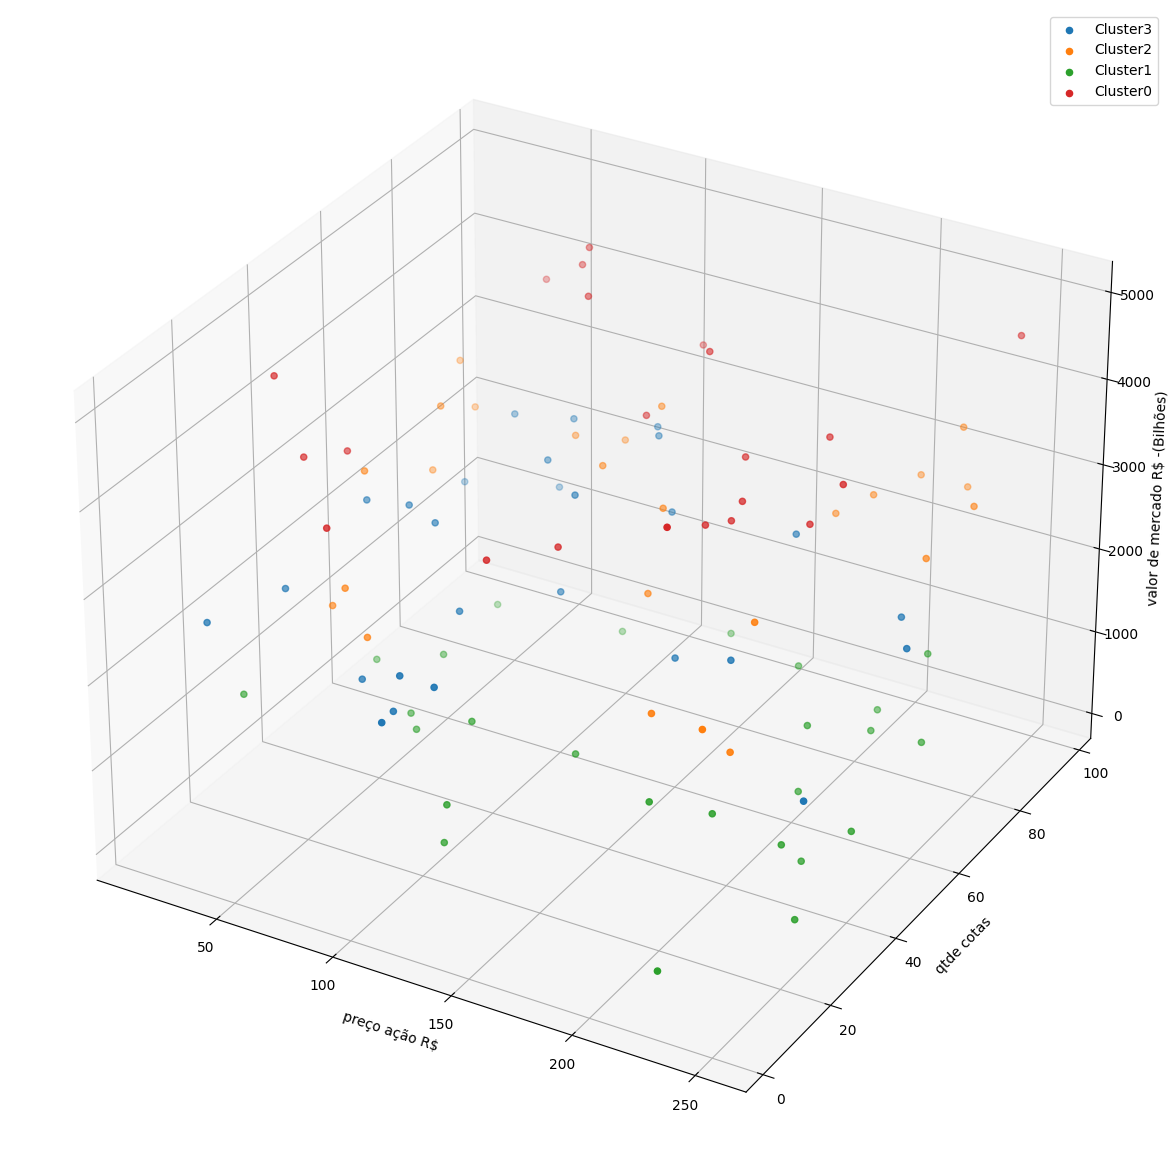

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           143.000000   49.772727                     4263.636364   
1           153.038462   50.307692                      553.961538   
2           149.680000   52.760000                     3137.320000   
3           101.740741   54.777778                     2101.259259   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.045455           0.136364          0.227273   
1               0.038462           0.230769          0.384615   
2               0.200000           0.080000          0.200000   
3               0.185185           0.074074          0.185185   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.090909         0.045455         0.227273  
1    

In [141]:
# Visualizando os grupos no grafico 3d
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
for cluster in data_n['Cluster'].unique():
    cluster_data=data_n[data_n['Cluster']==cluster]
    ax.scatter(cluster_data['preço ação R$'],cluster_data['qtde cotas'],
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster{cluster}')
ax.set_xlabel('preço ação R$')
ax.set_ylabel('qtde cotas')
ax.set_zlabel('valor de mercado R$ -(Bilhões)')
plt.legend()
plt.show()

# Analisando os clusters
cluster_means = data_n.groupby('Cluster').mean()
print(cluster_means)

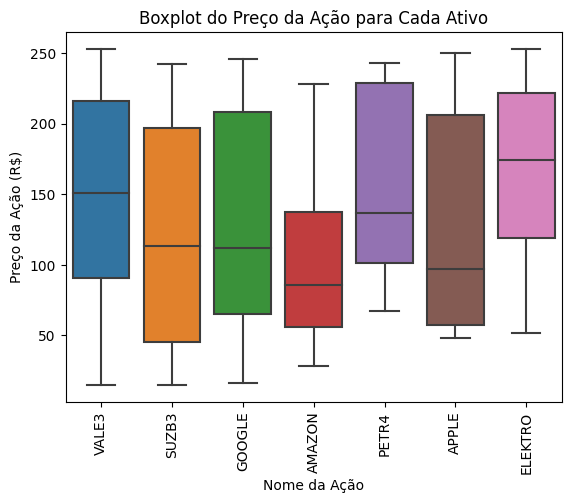

In [142]:
# Plotar boxplot para o preço da ação
sns.boxplot(x=df['nome ação'],y=df['preço ação R$'])

# Configurações do gráfico
plt.xticks(rotation=90)  # Rotacionar os nomes das ações para melhor visualização
plt.title('Boxplot do Preço da Ação para Cada Ativo')
plt.xlabel('Nome da Ação')
plt.ylabel('Preço da Ação (R$)')

# Mostrar o gráfico
plt.show()

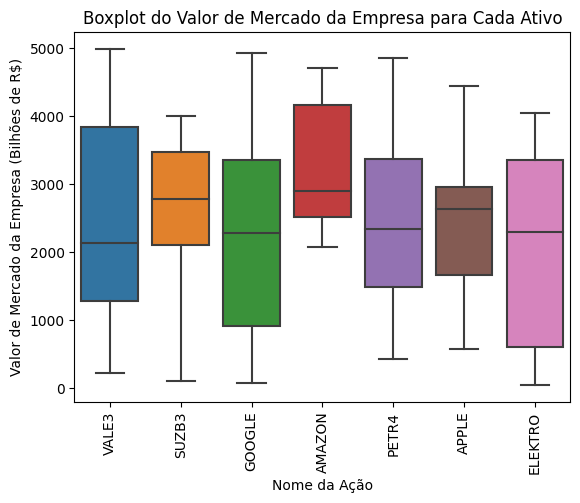

In [143]:
# Plotar boxplot para o valor de mercado da empresa
sns.boxplot(x=df['nome ação'],y=df['valor de mercado R$ -(Bilhões)'])

# Configurações do gráfico
plt.xticks(rotation=90)  # Rotacionar os nomes das ações para melhor visualização
plt.title('Boxplot do Valor de Mercado da Empresa para Cada Ativo')
plt.xlabel('Nome da Ação')
plt.ylabel('Valor de Mercado da Empresa (Bilhões de R$)')

# Mostrar o gráfico
plt.show()

In [144]:
# Ver as informações do DataFrame
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   preço ação R$                   100 non-null    int64
 1   qtde cotas                      100 non-null    int64
 2   valor de mercado R$ -(Bilhões)  100 non-null    int64
 3   nome ação_APPLE                 100 non-null    bool 
 4   nome ação_ELEKTRO               100 non-null    bool 
 5   nome ação_GOOGLE                100 non-null    bool 
 6   nome ação_PETR4                 100 non-null    bool 
 7   nome ação_SUZB3                 100 non-null    bool 
 8   nome ação_VALE3                 100 non-null    bool 
 9   Cluster                         100 non-null    int32
dtypes: bool(6), int32(1), int64(3)
memory usage: 3.4 KB


In [145]:
# Ver as estatísticas descritivas
data_n.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),Cluster
count,100.000000,100.000000,100.00000,100.000000
mean,136.140000,52.010000,2433.70000,1.570000
std,75.237942,27.475791,1397.29373,1.112418
min,15.000000,2.000000,52.00000,0.000000
25%,67.000000,28.250000,1189.25000,1.000000
50%,121.500000,55.500000,2433.00000,2.000000
75%,209.000000,76.500000,3616.50000,3.000000
max,253.000000,97.000000,4993.00000,3.000000


In [146]:
# 3 - Pré-processamento dos Dados

# Verificar se há valores nulos
data_n.isnull().sum()

# Exemplo de como preencher os valores nulos
data_n['preço ação R$'] = data_n['preço ação R$'].fillna(data_n['preço ação R$'].mean())
data_n['valor de mercado R$ -(Bilhões)'] = data_n['valor de mercado R$ -(Bilhões)'].fillna(data_n['valor de mercado R$ -(Bilhões)'].mean())

In [147]:
# Excluir linhas com valores ausentes
data_n = data_n.dropna()

In [ ]:
# 4 - Algoritmo K-means
# A) Implementando o K-means com 4 clusters

# Selecionar as características numéricas para o K-means
features = data_n[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Normalizar os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar K-means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data_n['Cluster'] = kmeans.fit_predict(features_scaled)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# B) Alterar o Número de Clusters para 5

# Aplicar K-means com 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
data_n['Cluster_5'] = kmeans_5.fit_predict(features_scaled)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# C) Alterar o Número de Clusters para 8

# Aplicar K-means com 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=42)
data_n['Cluster_8'] = kmeans_8.fit_predict(features_scaled)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

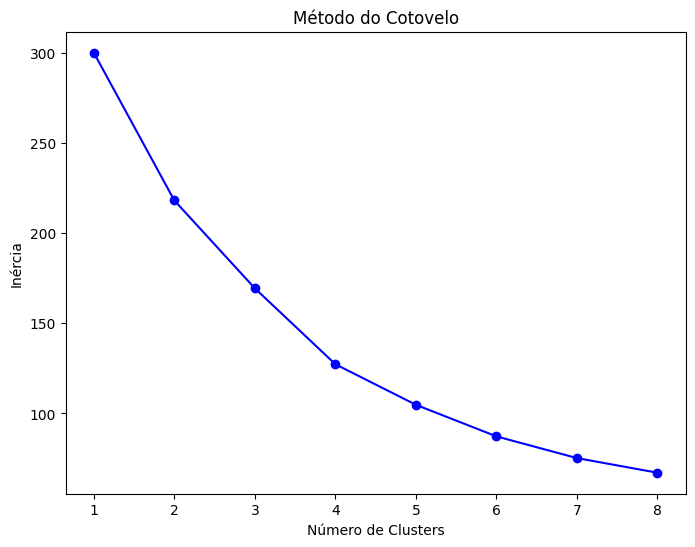

In [ ]:
# 4d - Plotando o Gráfico do Cotovelo (Elbow Method)

# Método do cotovelo
inertia = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inertia, marker='o', color='b')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

Silhouette Score para 4 clusters: 0.3029520474311305


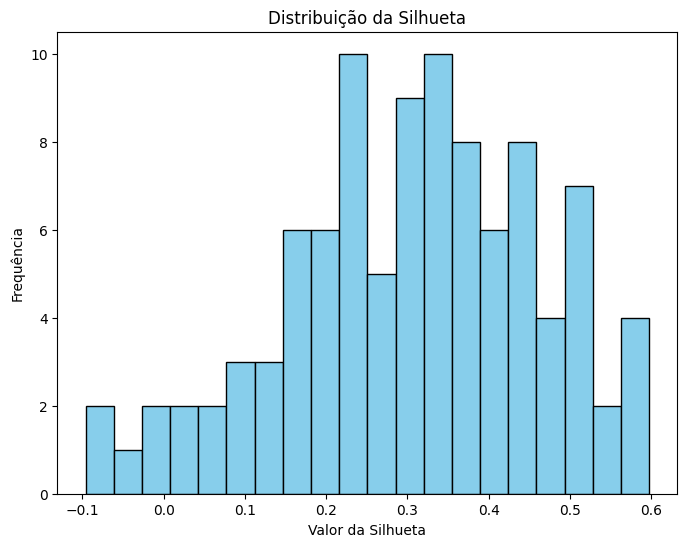

In [153]:
# 4e - Plotando o Gráfico da Silhueta

# Calcular o Silhouette Score para 4 clusters
silhouette_avg = silhouette_score(features_scaled, data_n['Cluster'])
print(f'Silhouette Score para 4 clusters: {silhouette_avg}')

# Calcular e plotar a silhueta para os clusters
silhouette_values = silhouette_samples(features_scaled, data_n['Cluster'])
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Silhueta')
plt.xlabel('Valor da Silhueta')
plt.ylabel('Frequência')
plt.show()

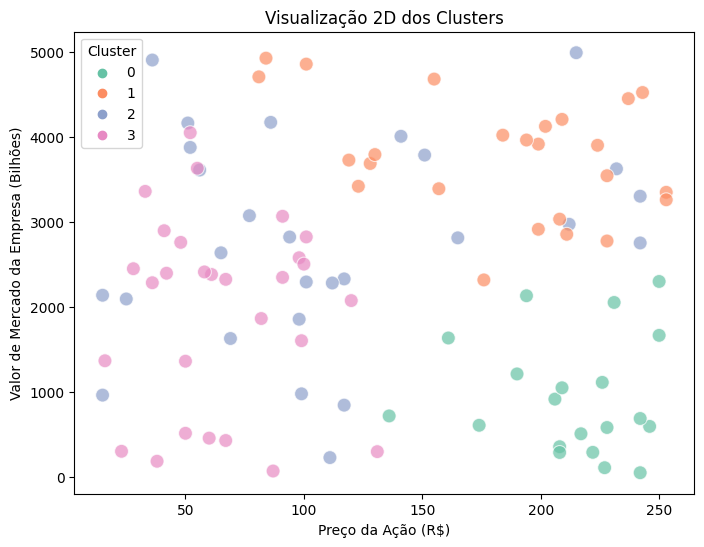

In [155]:
# 5 - Visualização dos Clusters Formados
# A) Visualização 2D dos Clusters

# Visualização 2D dos clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_n['preço ação R$'], y=data_n['valor de mercado R$ -(Bilhões)'], hue=data_n['Cluster'], palette='Set2', s=100, alpha=0.7)
plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado da Empresa (Bilhões)')
plt.show()


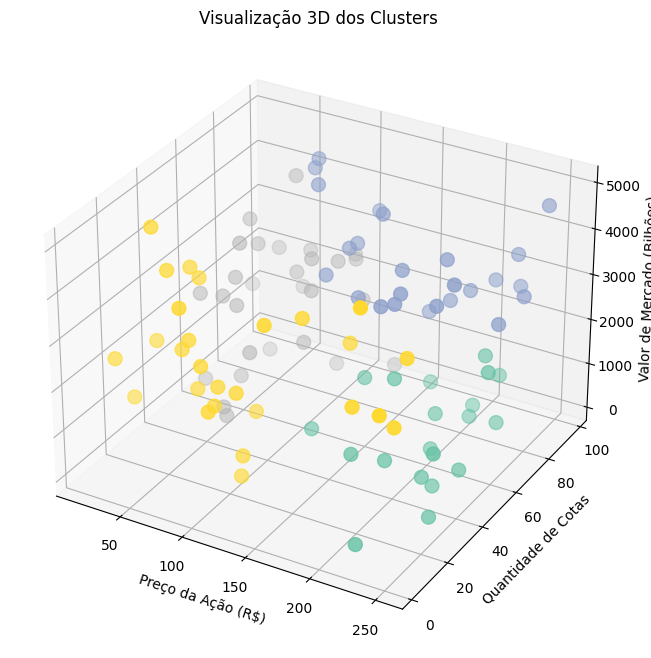

In [157]:
# B) Visualização 3D dos Clusters

# Visualização 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os dados
ax.scatter(data_n['preço ação R$'], data_n['qtde cotas'], data_n['valor de mercado R$ -(Bilhões)'], c=data_n['Cluster'], cmap='Set2', s=100)
ax.set_xlabel('Preço da Ação (R$)')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')
plt.title('Visualização 3D dos Clusters')
plt.show()

In [ ]:
"""
6 - Vantagem do Aprendizado Não Supervisionado sobre o Aprendizado Supervisionado

A maior vantagem do aprendizado não supervisionado em relação ao aprendizado supervisionado é que ele não exige dados rotulados 
(ou seja, não é necessário ter a variável alvo). Isso permite explorar dados sem rótulos previamente definidos e descobrir padrões ou 
estruturas ocultas nos dados, como clusters ou relações entre variáveis. Esse tipo de aprendizado é útil quando você não tem uma variável alvo clara, 
como no caso de segmentação de mercado ou análise de agrupamentos em grandes volumes de dados.
"""